In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

In [2]:
df=pd.read_csv('df_merged_with_lat_lon_trimmed_with_ohe_school_types.csv')
del df['Unnamed: 0']#tidy up random extra column

In [3]:
df.shape

(22254, 57)

In [5]:
#collect the columns names for non-target features, set EHC plan as target
X = df.drop(['SEN support','EHC plan','URN'], axis = 1).values #
y = df['EHC plan'].values

In [6]:
#WITH OUTLIERS   -collect the columns names for non-target features, set EHC plan as target
#must set to df instead of new_df to use without outliers removed
X = df.drop(['SEN support','EHC plan','URN'], axis = 1).values #
y = df['EHC plan'].values

Text(0.5, 1.0, 'Before')

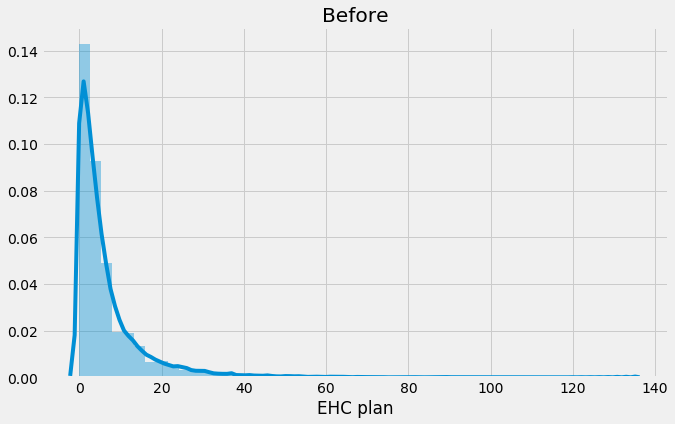

In [7]:
#Plot the distribution of EHC plan
'''NOTE THIS IS WITHOUT OUTLIERS REMOVED - need to pass new_df to get plot after outlier removal'''
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 6))
sns.distplot(df['EHC plan'])#can add bins=
plt.title('Before')

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

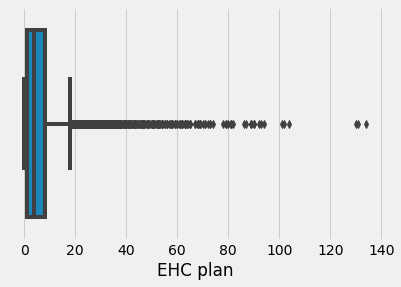

In [9]:
sns.boxplot(x=df['EHC plan'])

In [10]:
#removing outliers using z_scores

from scipy import stats
z_scores = stats.zscore(df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

In [11]:
new_df.shape#check shape of df with outliers removed

(12926, 57)

In [12]:
df.shape

(22254, 57)

Commented out code below was just exploring some correlations

In [13]:
# fig, ax = plt.subplots(figsize=(16,8))
# ax.scatter(df['EHC plan'], df['Number of key stage 3 pupils (years 7 to 9)'])

**Linear Regression Baseline Model**

In [14]:
#split data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# build the model
model = LinearRegression()  
model.fit(X_train, y_train)

# print(model.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#calculate the predictions of the linear regression model
y_pred = (model.predict(X_test)).astype(np.int64)

#build a new data frame with two columns, the actual values of the test data, 
#and the predictions of the model
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_head = df_compare.head(25)
# print(df_head)

In [16]:
model.score(X, y)
# gives the R2 score

0.46033436103921577

In [17]:
mean_absolute_error(y_test, y_pred) # gives the mean absolute error score

3.681524083393242

Commented out cell below displays a regression histogram but the regression chart below was chosen instead.

In [18]:
# df_head.plot(kind='bar',figsize=(10,8))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

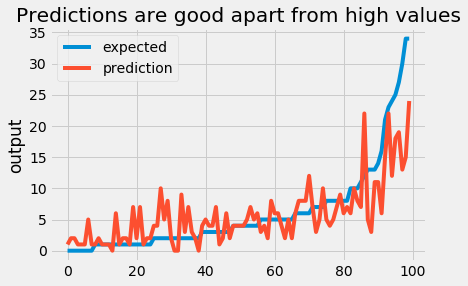

In [19]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.title( 'Predictions are good apart from high values')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    
chart_regression(y_pred[:100].flatten(),y_test[:100],sort=True) 

Try Ridge regularisation

In [20]:
#try ridge regression on the same data

from sklearn.linear_model import Ridge
my_alpha = 0.1 # try various values
my_model = Ridge(alpha = my_alpha)
my_model.fit(X, y)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
#calculate the predictions of the ridge regression model
y_pred = (my_model.predict(X_test)).astype(np.int64)

#build a new data frame with two columns, the actual values of the test data, 
#and the predictions of the model
df_compare_ridge = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_head = df_compare_ridge.head(25)
# print(df_head)

In [22]:
my_model.score(X, y)#display r2 score

0.46208820767359615

In [23]:
mean_absolute_error(y_test, y_pred)#display mean absolute error

3.651329978432782

Try Lasso regularisation to see if it makes a difference

In [24]:
from sklearn.linear_model import Lasso
my_alpha = 0.1 # try various values
my_model = Lasso(alpha = my_alpha)
my_model.fit(X, y)

C:\Users\marti\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199861.60291531228, tolerance: 179.26373135616066
  positive)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [25]:
my_model.score(X, y)#display r2 score

0.45704906298097187

In [26]:
mean_absolute_error(y_test, y_pred)#display mean absolute error

3.651329978432782

**Now introducing the Random Forest Regressor Model**

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
# Instantiate model with 50 decision trees
rf = RandomForestRegressor(n_estimators = 50, random_state = 42)

# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [29]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = predictions - y_test
# # Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
# # Print out the root mean squared error 
print('Root Mean Squared Error:', np.sqrt(((errors)**2).mean()))

Mean Absolute Error: 0.23
Root Mean Squared Error: 6.535302179902196


In [30]:
rf.score(X_test, y_test)#display r2 score

0.49273725931790235

In [31]:
#calculate the predictions of the random forest regression model
y_pred_forest = predictions.astype(np.int64)

#build a new data frame with two columns, the actual values of the test data, 
#and the predictions of the model
df_compare_forest = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_forest})
df_head_forest = df_compare_forest.head(25)
# print(df_head_forest)
# chart_regression(y_pred_forest[:100].flatten(),y_test[:100],sort=True)

Get the 15 most important features

In [32]:
df_X=new_df.drop(['SEN support','EHC plan','URN'], axis = 1) # need df_X to get feature importance to work properly

In [33]:
def feat_importance(rf,df_X):
    importance = rf.feature_importances_
    importance = pd.DataFrame(importance,index=df_X.columns,columns=["Importance"])
    return importance.sort_values(by=['Importance'],ascending=False)
importance = feat_importance(rf,df_X)
# importance[:]

Plot the 15 most important features

Text(0.5, 1.0, 'Number of boys is highly predictive \n')

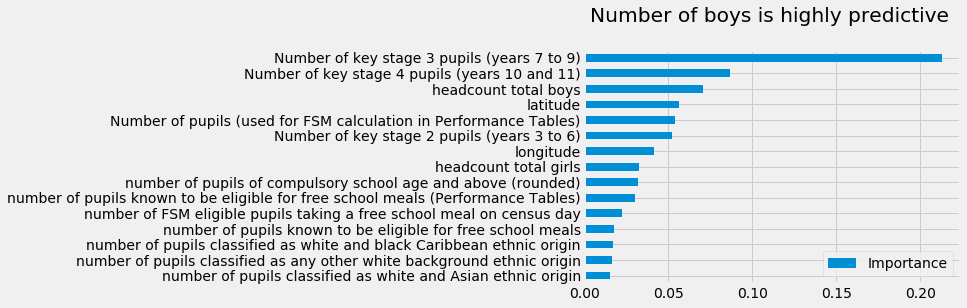

In [34]:
check=importance.sort_values(by='Importance')
check[-15:].plot(kind='barh')
plt.title('Number of boys is highly predictive \n')

Discarding features with feature coefficients less than 0.01

In [35]:

to_keep = importance[importance['Importance'] > 0.01].index
df_important_feat=new_df[to_keep]

#collect the columns names for non-target features, set EHC plan as target
X = df_important_feat.values
y = new_df['EHC plan'].values

#split data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [36]:
# Instantiate model 
rf = RandomForestRegressor(n_estimators=50, min_samples_leaf=4, max_features=0.5, bootstrap=True, random_state = 42)

# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = predictions - y_test
# # Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
# # Print out the root mean squared error 
print('Root Mean Squared Error:', np.sqrt(((errors)**2).mean()))
## Print out the R2 score
print('R2 score:', rf.score (X_test, y_test))

Mean Absolute Error: 0.08
Root Mean Squared Error: 3.9599906805990503
R2 score: 0.4107885262281775


Plot heatmap to show correlated features

In [37]:
import seaborn as sns

Text(0.5, 1, 'A heatmap quickly shows correlated features \n')

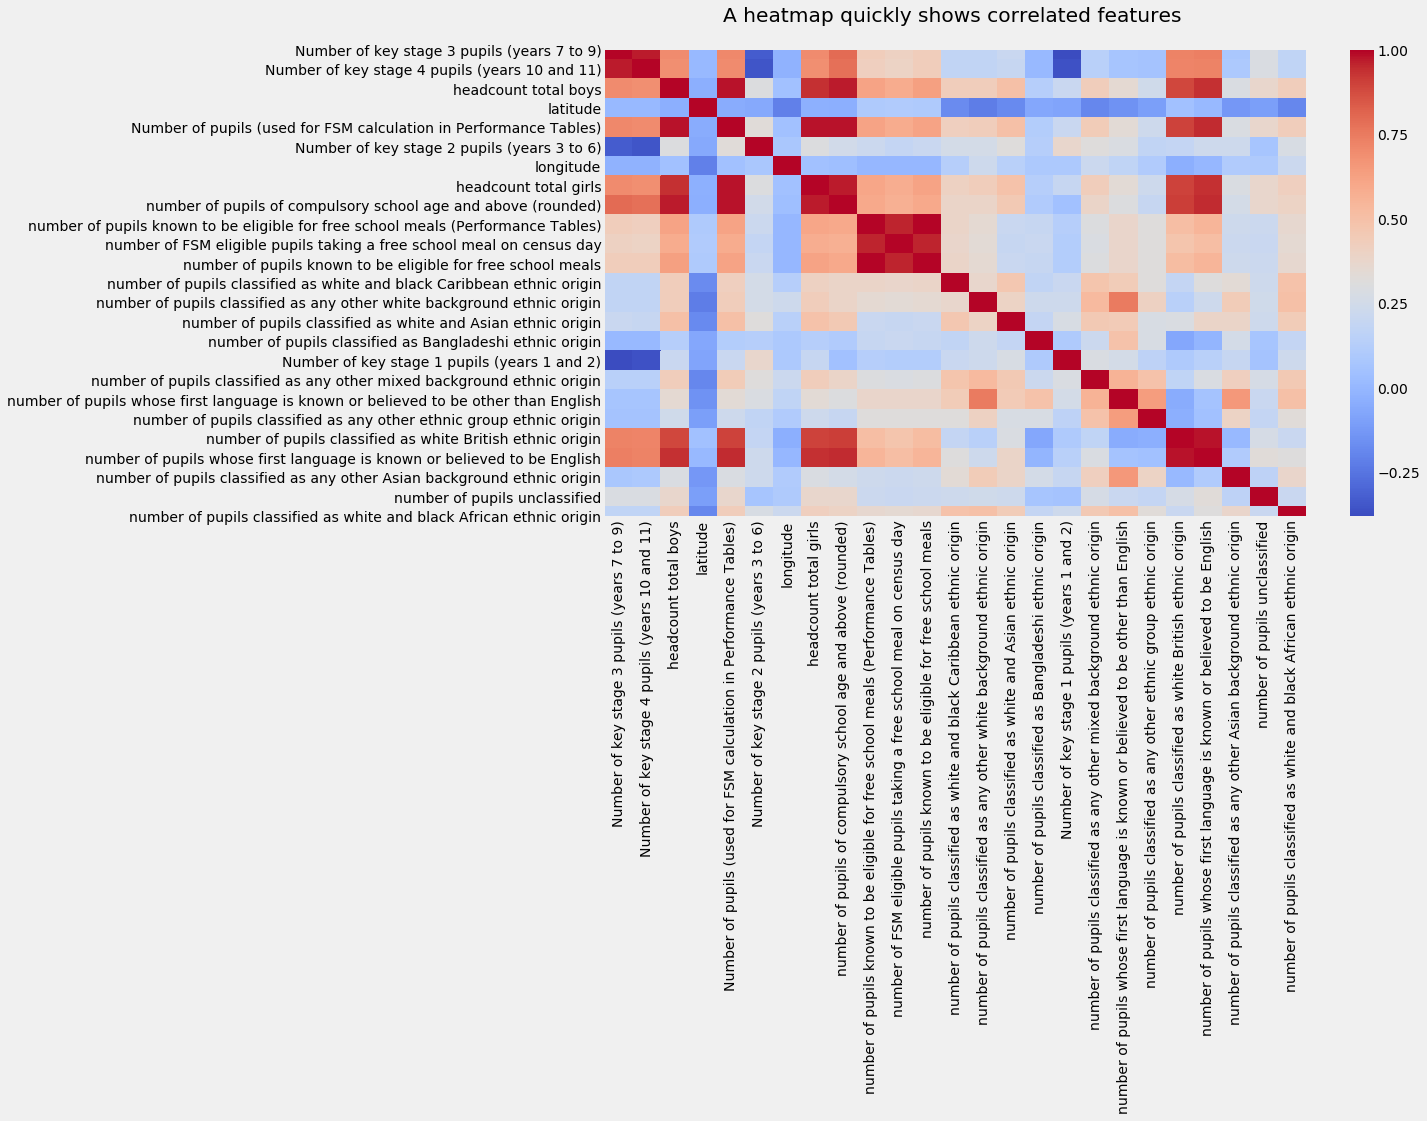

In [58]:
plt.figure(figsize=(14, 8))
corr_matrix = df_important_feat.corr().round(2)
sns.heatmap(data=corr_matrix,cmap='coolwarm',annot=False)
plt.title('A heatmap quickly shows correlated features \n')

Remove highly correlated features

In [39]:
newer_df=df_important_feat.drop(['number of pupils of compulsory school age and above (rounded)','Number of pupils (used for FSM calculation in Performance Tables)', 'number of pupils classified as white British ethnic origin','number of pupils whose first language is known or believed to be English', 'number of FSM eligible pupils taking a free school meal on census day', 'Number of key stage 3 pupils (years 7 to 9)', 'number of FSM eligible pupils taking a free school meal on census day', 'number of pupils known to be eligible for free school meals (Performance Tables)', 'number of pupils classified as any other white background ethnic origin', 'number of pupils whose first language is known or believed to be other than English'], axis = 1)

Text(0.5, 1, 'After removing highly correlated features \n')

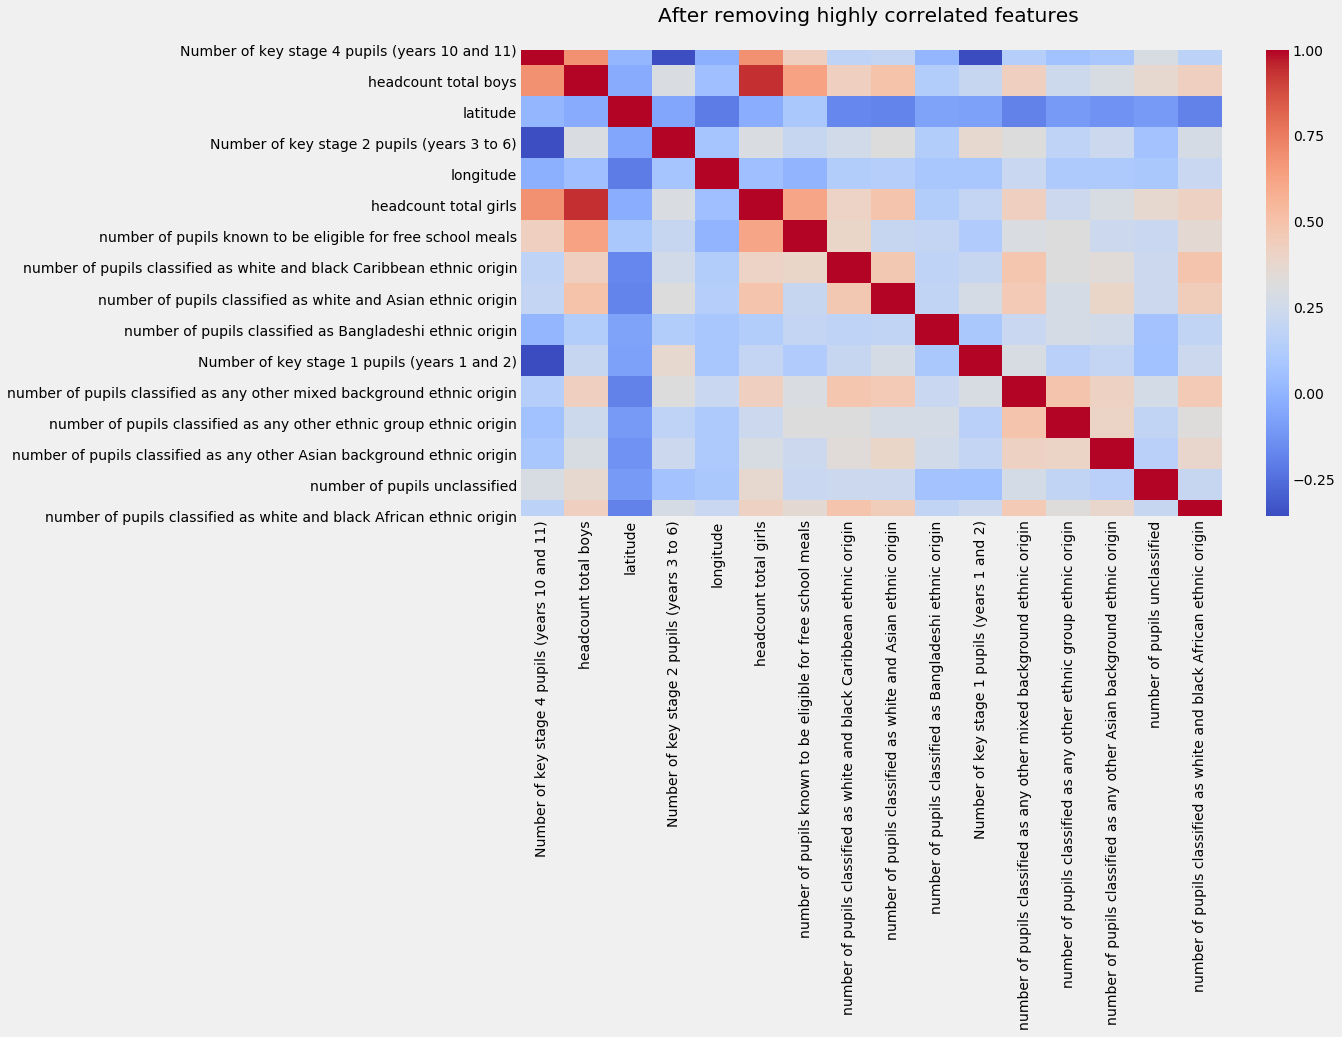

In [40]:
plt.figure(figsize=(14, 8))
corr_matrix = newer_df.corr().round(2)
sns.heatmap(data=corr_matrix,cmap='coolwarm',annot=False)
plt.title('After removing highly correlated features \n')

Now try fitting a new random forest model to see if it does any better

In [41]:
#collect the columns names for non-target features, set EHC plan as target
X = newer_df.values #
y = new_df['EHC plan'].values

In [42]:
# Instantiate model 
rf = RandomForestRegressor(n_estimators=50, min_samples_leaf=4, max_features=0.5, bootstrap=True, random_state = 42)

# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = predictions - y_test
# # Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
# # Print out the root mean squared error 
print('Root Mean Squared Error:', np.sqrt(((errors)**2).mean()))
## Print out the R2 score
print('R2 score:', rf.score (X_test, y_test))

Mean Absolute Error: 0.08
Root Mean Squared Error: 3.9599906805990503
R2 score: 0.4107885262281775


Use RandomizedSearchCV to autotune the hyperparameters

In [43]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.arange(start = 10, stop = 100, step = 2)]
max_features = [0.5,'auto', 'sqrt','log2']
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# First create the base model to tune
m = RandomForestRegressor()
# Fit the random search model
m_random = RandomizedSearchCV(estimator = m, pre_dispatch=2, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = 1)
m_random.fit(X_train, y_train)
m_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=20, min_samples_leaf=2, max_features=sqrt, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=20, min_samples_leaf=2, max_features=sqrt, bootstrap=False, total=   0.5s
[CV] n_estimators=20, min_samples_leaf=2, max_features=sqrt, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=20, min_samples_leaf=2, max_features=sqrt, bootstrap=False, total=   0.5s
[CV] n_estimators=20, min_samples_leaf=2, max_features=sqrt, bootstrap=False 
[CV]  n_estimators=20, min_samples_leaf=2, max_features=sqrt, bootstrap=False, total=   0.5s
[CV] n_estimators=28, min_samples_leaf=4, max_features=log2, bootstrap=False 
[CV]  n_estimators=28, min_samples_leaf=4, max_features=log2, bootstrap=False, total=   0.5s
[CV] n_estimators=28, min_samples_leaf=4, max_features=log2, bootstrap=False 
[CV]  n_estimators=28, min_samples_leaf=4, max_features=log2, bootstrap=False, total=   0.4s
[CV] n_estimators=28, min_samples_leaf=4, max_features=log2, bootstrap=False 
[CV]  n_estimators=28, min_samples_leaf=4, max_features=log2, bootstrap=False, total=   0.4s
[CV] n_estimators=72, min_samples_leaf=4, max_features=0.5, bootstrap=True 
[CV]  n_estimators=72, min_samples_leaf=4, max_features=0.5, bootstrap=True, total=   1.8s
[CV] n_estimators=72, min_samples_leaf=4, max_features=0

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   37.5s finished


{'n_estimators': 90,
 'min_samples_leaf': 4,
 'max_features': 0.5,
 'bootstrap': True}

Instantiate model with optimised params decision trees

In [44]:
rf_optimal = RandomForestRegressor(n_estimators= 90, min_samples_leaf= 4, max_features= 0.5, bootstrap= True, random_state = 42, oob_score=True)

# Train the model on training data
rf_optimal.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=90,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=False)

In [45]:
# Use the forest's predict method on the test data
predictions = rf_optimal.predict(X_test)
# Calculate the absolute errors
errors = predictions - y_test
# # Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
# # Print out the root mean squared error 
print('Root Mean Squared Error:', np.sqrt(((errors)**2).mean()))
## Print out the R2 score
print('R2 score:', rf_optimal.score (X_test, y_test))

Mean Absolute Error: 0.08
Root Mean Squared Error: 3.941954546935258
R2 score: 0.41614353674115445


In [46]:
rf_optimal.oob_score_

0.39913007218400476

<h2>PyTorch Model</h2>

In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import torch.optim as optim

Create a validation set this time too

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.125, random_state=0)

In [49]:
class MyDataset(Dataset):
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __getitem__(self, i):
        return self.X[i], self.y[i]
        
    def __len__ (self):
        return len(self.X)


y_train = np.atleast_2d(y_train).T
y_valid = np.atleast_2d(y_valid).T 
y_test = np.atleast_2d(y_test).T 
train_dataset = MyDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())#check  -try int instead
valid_dataset = MyDataset(torch.from_numpy(X_valid).float(), torch.from_numpy(y_valid).long())
test_dataset = MyDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

In [50]:
print('What size batch do you want to use?')
b_size = int(input())#50 is given originally

train_loader = DataLoader(dataset=train_dataset,batch_size=b_size)
valid_loader = DataLoader(dataset=valid_dataset) #, batch_size=1000
test_loader = DataLoader(dataset=test_dataset)

What size batch do you want to use?
64


In [51]:
#Define train hyperparams.
n_hidden1= 100
n_hidden2=50

#Hyperparams from data.  
input_size=X_train.shape[1] #Number of columns in input matrix

In [52]:
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.h1 = nn.Linear(input_size, n_hidden1)   
        self.o = nn.Linear(n_hidden1, 1)   # only one output is needed as its a regression task

    def forward(self, x):
        o = F.relu(self.h1(x))      # activation function for hidden layer
        o = self.o(o)             # linear output
        return o
simple_net = SimpleNet()

In [53]:
class TwoLayerNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.h1 = nn.Linear(input_size, n_hidden1)   
        self.h2 = nn.Linear(n_hidden1, n_hidden2)  
        self.o = nn.Linear(n_hidden2, 1)   # only one output is needed as its a regression task

    def forward(self, x):
        o = F.relu(self.h1(x))      # activation function for hidden layer
        o = F.relu(self.h2(o)) 
        o = self.o(o)             # linear output
        return o
net = TwoLayerNet()

In [54]:
def train(net):

    loss_function = nn.L1Loss(size_average=True) # using mean absolute error

    print('How many epochs do you want to train?')
    n_epochs= int(input())#50 is given originally
    
    print('What learning rate would you like to use?')
    lr= float(input())#0.01 is given originally

    optimizer=optim.Adam(net.parameters(), lr=lr)
    loss_history=[]
    valid_history=[]
    
    for epoch in range(n_epochs):
        loss_epoch=0

        for X_batch,y_batch in train_loader:
            optimizer.zero_grad()
            output=net.forward(X_batch)#
            loss = loss_function(output, y_batch)
            loss.backward()
            optimizer.step()

            loss_epoch+=loss.detach().numpy()
        loss_history.append(loss_epoch/len(train_loader))#take the mean so we can compare with valid_loss

        # Validation phase

        with torch.no_grad():
            val_loss_epoch=0
            for X_val,y_val in valid_loader:
                output = net.forward(X_val)
                val_loss = loss_function(output, y_val)
                val_loss_epoch+=val_loss.numpy()#don't need detach() because already no_graded.
            valid_history.append(val_loss_epoch/len(valid_loader))


#     return loss_history, valid_history
    print('Mean Absolute Error = ', loss_epoch/len(train_loader))
    return loss_history, valid_history

In [55]:
loss_history, valid_history = train(net)

C:\Users\marti\Anaconda3\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


How many epochs do you want to train?
50
What learning rate would you like to use?
0.01
Mean Absolute Error =  2.683884235335068


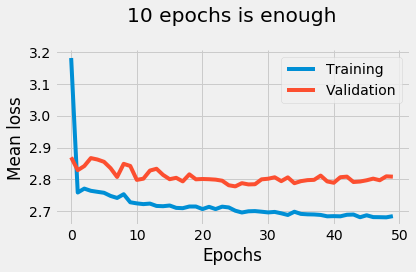

In [56]:
plt.style.use('fivethirtyeight')
plt.plot(loss_history, label='Training')
plt.plot(valid_history, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Mean loss')
plt.title('10 epochs is enough\n')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tight_layout()

In [57]:
def test_loss(net):

    loss_function = nn.L1Loss(size_average=True) # using mean absolute error
    for X_batch,y_batch in test_loader:
            output=net.forward(X_batch)#
            loss = loss_function(output, y_batch)
            loss=loss.detach().numpy()
    print('Mean Absolute Error = ', loss)
test_loss(simple_net)

C:\Users\marti\Anaconda3\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Mean Absolute Error =  6.6197577
